This notebook assumes you have already followed the steps in `README.md`. If not, do that first!

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.compat.v1 as tf
import argparse
import math

In [3]:
tf.enable_eager_execution()

# Show example of images

In [10]:
dirlist = lambda di: [os.path.join(di, file) for file in os.listdir(di)]
training_files = dirlist('testimages/')

def parse_visual(data):
    dataset = tf.data.TFRecordDataset(data)
    # pattern for one part file
    # dataset = tf.data.TFRecordDataset('part-r-00099')
    iterator = dataset.make_one_shot_iterator()

    features = {
        'B1': tf.FixedLenSequenceFeature([65], tf.int64,allow_missing=True),
        'B2': tf.FixedLenSequenceFeature([65], tf.int64,allow_missing=True),
        'B3': tf.FixedLenSequenceFeature([65], tf.int64,allow_missing=True),
        'B4': tf.FixedLenSequenceFeature([65], tf.int64,allow_missing=True),
        'B5': tf.FixedLenSequenceFeature([65], tf.int64,allow_missing=True),
        'B6': tf.FixedLenSequenceFeature([65], tf.int64,allow_missing=True),
        'B7': tf.FixedLenSequenceFeature([65], tf.int64,allow_missing=True),
        'B8': tf.FixedLenSequenceFeature([65], tf.int64,allow_missing=True),
        'B9': tf.FixedLenSequenceFeature([65], tf.int64,allow_missing=True),
        'B10': tf.FixedLenSequenceFeature([65], tf.int64,allow_missing=True),
        'B11': tf.FixedLenSequenceFeature([65], tf.int64,allow_missing=True)
    }

    parsed_examples = [tf.parse_single_example(data, features) for data in iterator]
    return parsed_examples

parsed_examples = parse_visual(training_files[0])

In [11]:
def get_rgb_img_to_plot(parsed_example, intensify=True):
    rgbArray = np.zeros((65,65,3), 'int64')
    for i, band in enumerate(['B5', 'B3', 'B2']):
        band_data = parsed_example[band].numpy()
        if intensify:
            band_data = band_data/np.max(band_data)*255
        else:
            band_data = band_data*255
        rgbArray[..., i] = band_data
    return rgbArray

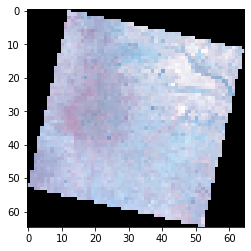

In [12]:
img= get_rgb_img_to_plot(parsed_examples[0])
plt.imshow(img);

In [15]:
def get_X_test_all_bands(parsed_example, intensify=True):
    elevenArray = np.zeros((65,65,11), 'int64')
    for i, band in enumerate(['B1','B4', 'B3', 'B2','B5','B6','B7','B8','B9','B10','B11']):
        band_data = parsed_example[band].numpy()
        if intensify:
            band_data = band_data/np.max(band_data)*255
        else:
            band_data = band_data*255
        elevenArray[..., i] = band_data
    return elevenArray

In [16]:
X_test_image = get_X_test_all_bands(parsed_examples[0])

In [19]:
X_test_image = X_test_image.reshape(1,65,65,11)

In [20]:
X_test_image.shape

(1, 65, 65, 11)

# TO DO: data augmentation